In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
class k_arm_bandit:
    def __init__(self,k,tp,param):
        self.reward=list(np.random.randn(k)) #赌博机的平均收益值
        self.right_oper=np.argmax(self.reward)
        self.steps=0
        self.k=k
        self.type=tp
        if tp=="epsilon_greedy":
            self.eps=param
        elif tp=="UCB":
            self.c=param
        self.tp=tp
        
        self.average_reward=[0]*k #当前轮次的每个动作的平均收益
        self.oper_nums=[0]*k #当前轮次每个动作的操作次数    
        
        self.all_average_reward=[] #当前轮次的平均收益
        self.all_reward=0
        self.right_operations=[] #当前轮次正确操作的概率
        self.right_operations_number=0
    
    def get_action_with_epsilon_greedy(self):
        x=random.random()
        if x<self.eps:
            return random.randint(0,self.k-1)
        else:
            max_operation=[]
            max_value=max(self.average_reward)
            for i in range(len(self.average_reward)):
                if self.average_reward[i]==max_value:
                    max_operation.append(i)
            return random.choice(max_operation)
        
    def get_action_with_UCL(self):
        inf=0x3f3f3f3f3f3f3f
        U=[0]*self.k
        for i in range(self.k):
            U[i]=self.average_reward[i]
            if self.oper_nums[i]==0:
                U[i]=inf
            else:
                U[i]+=self.c*math.sqrt(math.log(self.steps)/self.oper_nums[i])
        max_operation=[]
        max_value=max(U)
        for i in range(len(U)):
            if U[i]==max_value:
                max_operation.append(i)
        return random.choice(max_operation)
    
    def get_reward(self,oper_id):
        return self.reward[oper_id]+np.random.standard_normal()
    
    def update(self):
        self.steps+=1
        if self.tp=="epsilon_greedy":
            A=self.get_action_with_epsilon_greedy()
        elif self.tp=="UCB":
            A=self.get_action_with_UCL()
        R=self.get_reward(A)
        
        self.oper_nums[A]+=1
        self.average_reward[A]=self.average_reward[A]+1.0/self.oper_nums[A]*(R-self.average_reward[A])
        
        
        self.all_reward+=R
        if A==self.right_oper:
            self.right_operations_number+=1
        self.all_average_reward.append(self.all_reward/self.steps)
        self.right_operations.append(self.right_operations_number/self.steps)

In [3]:
class epsilon_greedy:
    def __init__(self,eps):
        self.all_reward=[0]*1000
        self.all_right_oper=[0]*1000
        self.iter_num=2000
        self.eps=0.1
        
    def wk(self):
        for iteration in range(self.iter_num):
            bandit=k_arm_bandit(10,"epsilon_greedy",0.1)
            for steps in range(1000):
                bandit.update()
            for i in range(1000):
                self.all_reward[i]+=bandit.all_average_reward[i]/self.iter_num
                self.all_right_oper[i]+=bandit.right_operations[i]/self.iter_num*100
            if((iteration+1)%100==0):
                print("iter : {} done".format(iteration+1))

In [4]:
class UCB:
    def __init__(self,c):
        self.all_reward=[0]*1000
        self.all_right_oper=[0]*1000
        self.iter_num=2000
        self.c=c
        
    def wk(self):
        for iteration in range(self.iter_num):
            bandit=k_arm_bandit(10,"UCB",self.c)
            for steps in range(1000):
                bandit.update()
            for i in range(1000):
                self.all_reward[i]+=bandit.all_average_reward[i]/self.iter_num
                self.all_right_oper[i]+=bandit.right_operations[i]/self.iter_num*100
            if((iteration+1)%100==0):
                print("iter : {} done".format(iteration+1))

In [5]:
g1=epsilon_greedy(0.1)
g1.wk()

iter : 100 done
iter : 200 done
iter : 300 done
iter : 400 done
iter : 500 done
iter : 600 done
iter : 700 done
iter : 800 done
iter : 900 done
iter : 1000 done
iter : 1100 done
iter : 1200 done
iter : 1300 done
iter : 1400 done
iter : 1500 done
iter : 1600 done
iter : 1700 done
iter : 1800 done
iter : 1900 done
iter : 2000 done


In [6]:
g2=UCB(2)
g2.wk()

iter : 100 done
iter : 200 done
iter : 300 done
iter : 400 done
iter : 500 done
iter : 600 done
iter : 700 done
iter : 800 done
iter : 900 done
iter : 1000 done
iter : 1100 done
iter : 1200 done
iter : 1300 done
iter : 1400 done
iter : 1500 done
iter : 1600 done
iter : 1700 done
iter : 1800 done
iter : 1900 done
iter : 2000 done


Text(0.5, 1.0, '% of best operations')

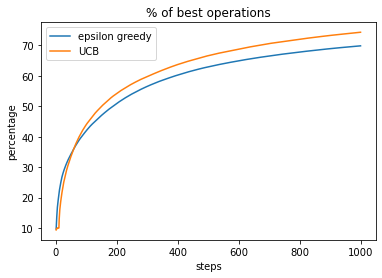

In [7]:
x=[i for i in range(1,1001)]
plt.plot(x,g1.all_right_oper,label='epsilon greedy')
plt.plot(x,g2.all_right_oper,label="UCB")
plt.ylabel("percentage")
plt.xlabel("steps")
plt.legend()
plt.title("% of best operations")

Text(0.5, 1.0, 'average reward')

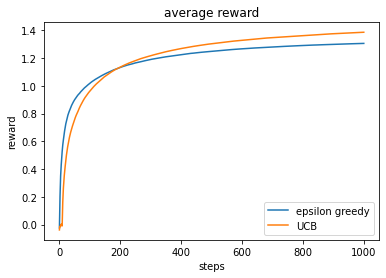

In [8]:
plt.plot(x,g1.all_reward,label='epsilon greedy')
plt.plot(x,g2.all_reward,label='UCB')
plt.ylabel("reward")
plt.xlabel("steps")
plt.legend()
plt.title("average reward")